In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pystan
%matplotlib inline

In [4]:
plt.style.use("ggplot")

In [8]:
df = pd.read_excel("./data/data.xlsx")

In [9]:
df.head()

,Unnamed: 0,0
0,0,3.896195
1,1,5.865766
2,2,5.860887
3,3,4.660614
4,4,5.263595


(array([ 1.,  1.,  5., 12., 10., 18., 16.,  8.,  5.,  4.]),
 array([2.29193477, 2.77510498, 3.25827519, 3.74144541, 4.22461562,
        4.70778584, 5.19095605, 5.67412627, 6.15729648, 6.64046669,
        7.12363691]),
 <BarContainer object of 10 artists>)

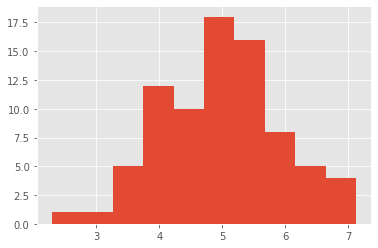

In [12]:
plt.hist(df[0])

In [13]:
stan_model = """
data {
  int N;
  real Y[N];
}

parameters {
  real mu;
  real<lower=0> sigma;
}

model {
  for (i in 1:N){
    Y[i] ~ normal(mu, sigma);
  }

}
"""

In [14]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3bfc06c08d0ba18d7e701a822b9f457f NOW.


In [15]:
stan_data = {"N":df.shape[0], "Y":df[0]}

In [20]:
fit = sm.sampling(data=stan_data, iter=2000, chains=1, warmup=500, seed=123)

In [21]:
fit

Inference for Stan model: anon_model_3bfc06c08d0ba18d7e701a822b9f457f.
1 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=1500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      4.98  3.2e-3   0.11   4.78   4.91   4.98   5.05   5.18   1074    1.0
sigma   0.97  2.4e-3   0.08   0.83   0.92   0.97   1.02   1.14   1121    1.0
lp__  -37.06    0.04   0.98 -39.65 -37.44 -36.77 -36.37 -36.11    658    1.0

Samples were drawn using NUTS at Sat Jan 30 18:57:58 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

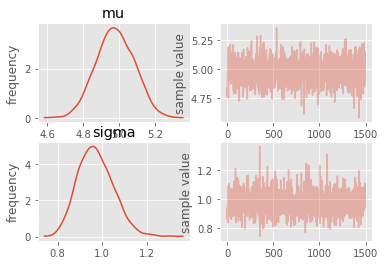

In [22]:
fig = fit.plot()

めちゃくちゃ重い、、、

# 単回帰

In [3]:
import numpy as np

In [4]:
df = pd.read_excel("./data/real_estate1.xlsx")

In [5]:
df.head()

,id,space,room,value
0,1,50,2LDK,3050
1,2,70,2LDK,4690
2,3,70,2SLDK,4830
3,4,70,3LDK,5040
4,5,90,3LDK,6570


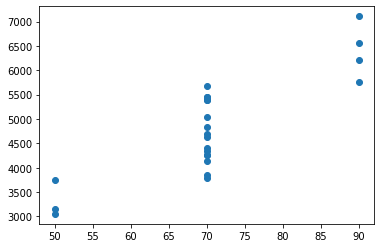

In [6]:
plt.scatter(df["space"], df["value"])

In [7]:
stan_model = """
data {
  int N;
  real X[N];
  real Y[N];
}

parameters {
  real a;
  real b;
  real<lower=0> sigma;
}

model {
  for (n in 1:N){
    Y[n] ~ normal(a * X[n] + b, sigma);
  }
}

"""

In [8]:
sm = pystan.StanModel(model_code = stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1ef597a9137b242c406fc64a47bf328b NOW.


In [9]:
stan_data = {"N":df.shape[0], "X":df["space"], "Y":df["value"]}

In [10]:
fit = sm.sampling(data = stan_data, iter=2000, chains=1, warmup=500, seed=123)

In [11]:
fit

Inference for Stan model: anon_model_1ef597a9137b242c406fc64a47bf328b.
1 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=1500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      78.69    0.51  11.27   56.3  71.53  78.75  86.04 102.63    483    1.0
b     -740.1   37.02 811.35  -2456  -1264 -735.7 -239.0 889.16    480    1.0
sigma 615.02    6.18 113.94 445.72 537.36 598.63 673.63 882.55    339    1.0
lp__  -152.0    0.08   1.45 -155.5 -152.6 -151.6 -151.0 -150.5    327    1.0

Samples were drawn using NUTS at Sat Jan 30 19:14:57 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

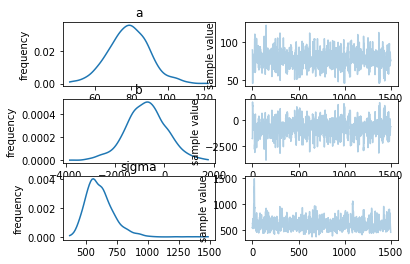

In [12]:
fig = fit.plot()